In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!wget https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz
!tar -xf flower_photos.tgz

--2025-03-25 19:45:17--  https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.98.207, 74.125.197.207, 74.125.135.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.98.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 228813984 (218M) [application/x-compressed-tar]
Saving to: ‘flower_photos.tgz’

flower_photos.tgz   100%[===================>] 218.21M   169MB/s    in 1.3s    

2025-03-25 19:45:19 (169 MB/s) - ‘flower_photos.tgz’ saved [228813984/228813984]



Flower Categories: ['tulips', 'daisy', 'LICENSE.txt', 'roses', 'sunflowers', 'dandelion']
Total images in 'daisy': 633


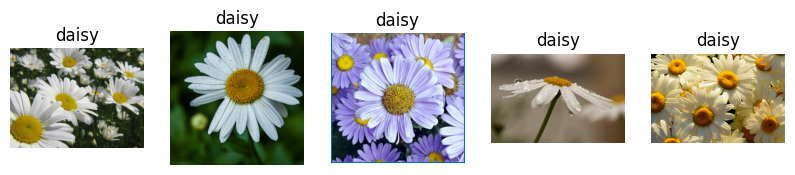

In [ ]:
import os
import matplotlib.pyplot as plt
from PIL import Image

# Path to the dataset
dataset_path = "flower_photos"

# Get the list of flower categories
categories = os.listdir(dataset_path)

# Print available flower categories
print("Flower Categories:", categories)

# Select a category (e.g., "daisy")
category = "daisy"
category_path = os.path.join(dataset_path, category)

# Get a list of image files in the category
image_files = os.listdir(category_path)

# Print total images in the category
print(f"Total images in '{category}':", len(image_files))

# Display the first 5 images
plt.figure(figsize=(10, 5))

for i in range(5):
    img_path = os.path.join(category_path, image_files[i])
    img = Image.open(img_path)

    plt.subplot(1, 5, i + 1)
    plt.imshow(img)
    plt.axis("off")
    plt.title(category)

plt.show()


Found 3670 files belonging to 5 classes.
Class names: ['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


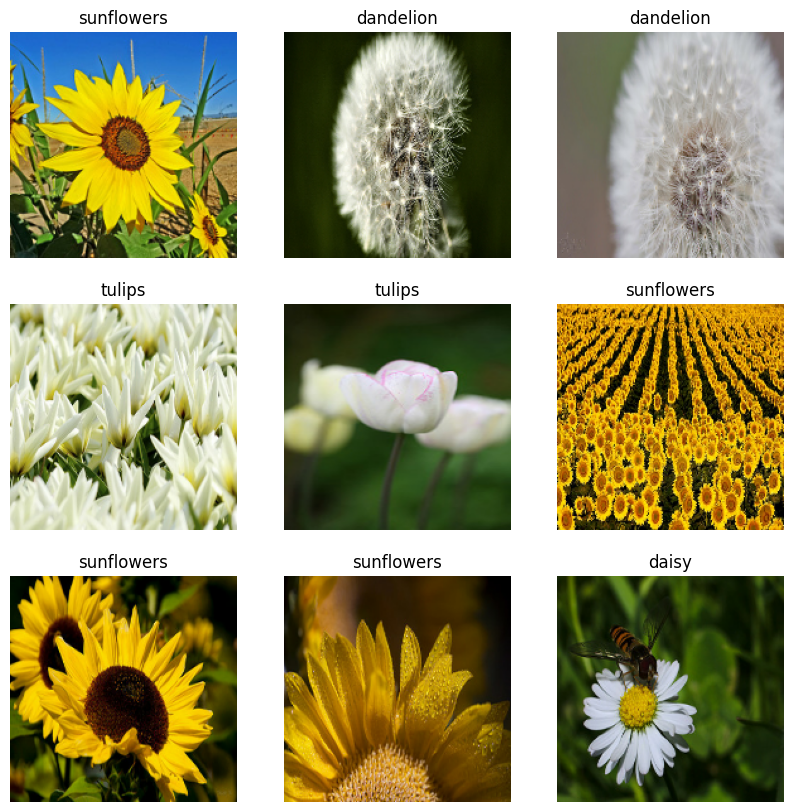

In [ ]:
import tensorflow as tf
import pathlib

# Convert dataset path to pathlib format
data_dir = pathlib.Path(dataset_path)

# Load images with TensorFlow
batch_size = 32
img_height = 180
img_width = 180

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

# Get class names
class_names = train_ds.class_names
print("Class names:", class_names)

# Display a batch of images
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):  # Take one batch
    for i in range(9):  # Show first 9 images
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")
    break  # Stop after one batch

plt.show()


In [ ]:
print(data_dir)

flower_photos


In [ ]:
img_height, img_width= 180, 180
batch_size = 32
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split = 0.2,
    subset = "training",
    seed = 123,
    label_mode = "categorical",
    image_size = (img_height, img_width),
    batch_size = batch_size
)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split = 0.3,
    subset = "validation",
    seed = 123,
    label_mode = "categorical",
    image_size = (img_height, img_width),
    batch_size = batch_size
)

Found 3670 files belonging to 5 classes.
Using 1101 files for validation.


In [ ]:
class_names = train_ds.class_names
class_names

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.applications import ResNet50

# Load Pretrained ResNet50 (without the top layers)
pretrained_model = ResNet50(include_top=False, input_shape=(180, 180, 3), weights='imagenet')

# Freeze the base model
for layer in pretrained_model.layers:
    layer.trainable = False

# Create a Sequential model
resnet_model = Sequential([
    pretrained_model,  # Add the pretrained model
    Flatten(),         # Flatten the output
    Dense(512, activation='relu'),  # Fully connected layer
    Dense(5, activation='softmax')  # Output layer
])

# Compile the model
resnet_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
resnet_model.summary()

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)                │ (None, 6, 6, 2048)          │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 73728)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      37,749,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │           2,565 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 61,339,525 (233.99 MB)

 Trainable params: 37,751,813 (144.01 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [ ]:
from tensorflow.keras.optimizers import Adam
resnet_model.compile(optimizer = Adam(learning_rate = 0.001), loss = "categorical_crossentropy", metrics = ["accuracy"])

In [ ]:
epochs = 10
history = resnet_model.fit(
    train_ds,
    validation_data = val_ds,
    epochs = epochs
)

Epoch 1/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 33s 216ms/step - accuracy: 0.6195 - loss: 21.2327 - val_accuracy: 0.8801 - val_loss: 0.6649
Epoch 2/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 23s 84ms/step - accuracy: 0.9296 - loss: 0.2937 - val_accuracy: 0.9146 - val_loss: 0.4532
Epoch 3/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 9s 95ms/step - accuracy: 0.9827 - loss: 0.0548 - val_accuracy: 0.9155 - val_loss: 0.5373
Epoch 4/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 10s 91ms/step - accuracy: 0.9931 - loss: 0.0174 - val_accuracy: 0.9037 - val_loss: 0.6632
Epoch 5/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 10s 91ms/step - accuracy: 0.9991 - loss: 0.0056 - val_accuracy: 0.9155 - val_loss: 0.5339
Epoch 6/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 8s 86ms/step - accuracy: 1.0000 - loss: 4.9671e-04 - val_accuracy: 0.9155 - val_loss: 0.5489
Epoch 7/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 9s 98ms/step - accuracy: 1.0000 - loss: 2.5425e-04 - val_accuracy: 0.9164 - val_loss: 0.5493
Epoch 8/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 8s 87ms/step - accuracy: 1.0000 - loss: 2.0135e-04 - val_ac

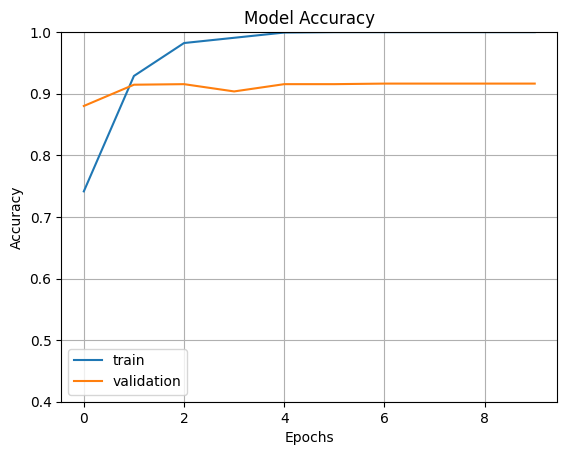

In [ ]:
#evaluate the model
fig1 = plt.gcf()
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.axis(ymin=0.4, ymax=1)
plt.grid()
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.legend(["train", "validation"])
plt.show()